# **Importing Python Libraries**



*   Numpy and Pandas have been used for data calculations and manipulations.
*   Matplotlib and Seaborn have been used for data visualizations.



In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [165]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12083144815122649398
xla_global_id: -1
]


# **Data Loading**

*Read the data from the CSV file into pandas dataframe*

In [166]:
df = pd.read_csv('../databases/cleaned_data.csv')

# **Exploratory Data Analysis**

*Data Inspection*

*Displaying the first few rows of the dataset*

In [167]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,NaN,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,NaN,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,NaN,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,NaN,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,NaN,16.10,1298.0,88.20,5.0


###Basic Dataset Information

Check the dimensions of the dataset


In [168]:
df.shape

(8028, 12)

In [169]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

### Checking data types

In [170]:
df.dtypes

name              object
year               int64
selling_price    float64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner            float64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8028 entries, 0 to 8027
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          0 non-null      float64
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 752.8+ KB


###Summary Statistics

In [172]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8.028000e+03,0.0,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,12.979337,6.977314e+04,NaN,19.391962,1462.914640,91.819726,5.421551
std,4.030836,0.838039,5.664419e+04,NaN,4.001972,504.759742,35.804513,0.963125
min,1983.000000,10.308919,1.000000e+03,NaN,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,12.468437,3.500000e+04,NaN,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,13.017003,6.000000e+04,NaN,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,13.429848,9.800000e+04,NaN,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,16.118096,2.360457e+06,NaN,42.000000,3604.000000,400.000000,14.000000


# **Data Preprocessing**

Following steps are carried out for data preprocessing:

In [173]:
# # Map 'First owner' to numerical values
# df.owner.unique()

# owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
# df['owner'] = df['owner'].map(owner_mapping)
# df['owner'] = df['owner'].astype(int)

# df

In [174]:
# Unique values in a column 'fuel'
# df.fuel.unique()

In [175]:
# Creating a Boolean series from isin()
mask = df['fuel'].isin(['CNG','LPG'])

# Select all the rows except the ones that contain 'CNG','LPG'
df = df [~mask]

print(df)

# Unique values in a column 'fuel' after removing the rows that contains 'CNG' and'LPG'
df.fuel.unique()

         name  year  selling_price  km_driven    fuel seller_type  \
0      Maruti  2014      13.017003     145500  Diesel  Individual   
1       Skoda  2014      12.821258     120000  Diesel  Individual   
2       Honda  2006      11.970350     140000  Petrol  Individual   
3     Hyundai  2010      12.323856     127000  Diesel  Individual   
4      Maruti  2007      11.775290     120000  Petrol  Individual   
...       ...   ...            ...        ...     ...         ...   
8023  Hyundai  2013      12.676076     110000  Petrol  Individual   
8024  Hyundai  2007      11.813030     119000  Diesel  Individual   
8025   Maruti  2009      12.853176     120000  Diesel  Individual   
8026     Tata  2013      12.577636      25000  Diesel  Individual   
8027     Tata  2013      12.577636      25000  Diesel  Individual   

     transmission  owner  mileage  engine  max_power  seats  
0          Manual    NaN    23.40  1248.0      74.00    5.0  
1          Manual    NaN    21.14  1498.0     1

array(['Diesel', 'Petrol'], dtype=object)

### Univariate Analysis

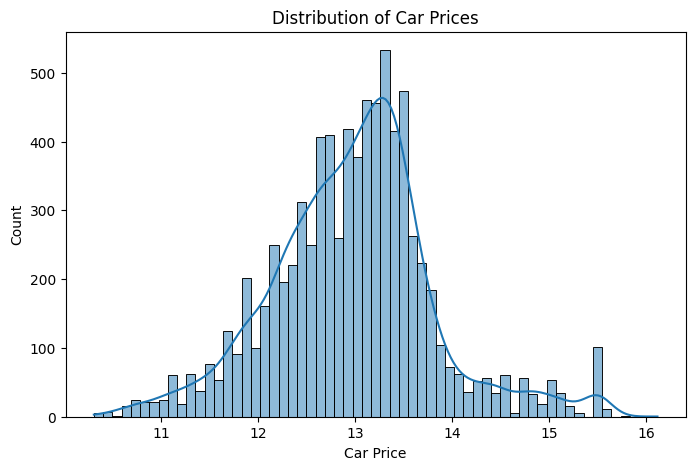

In [176]:
#Histogram of car prices

plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True)
plt.xlabel('Car Price')
plt.title('Distribution of Car Prices')
plt.show()

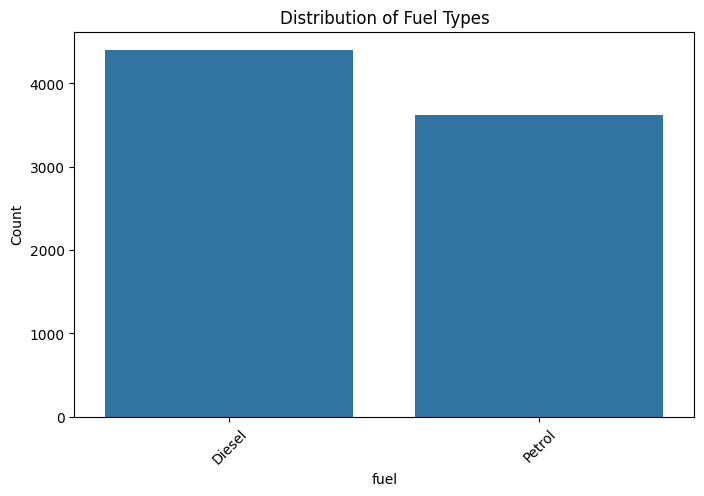

In [177]:
# Example: Bar plot for fuel type

plt.figure(figsize=(8, 5))
sns.countplot(x='fuel', data=df)
plt.xlabel('fuel')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types')
plt.xticks(rotation=45)
plt.show()

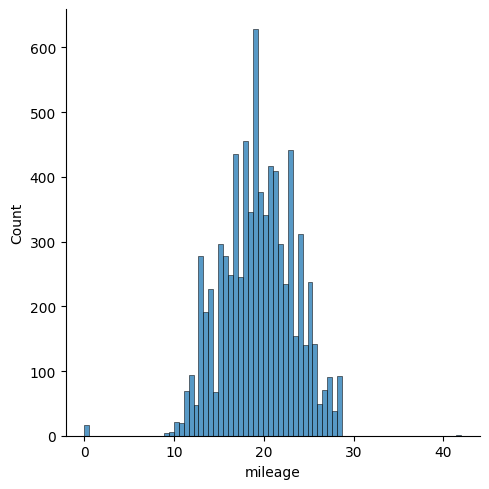

In [178]:
#Distribution Plot for mileage

sns.displot(df, x = 'mileage')
plt.show()

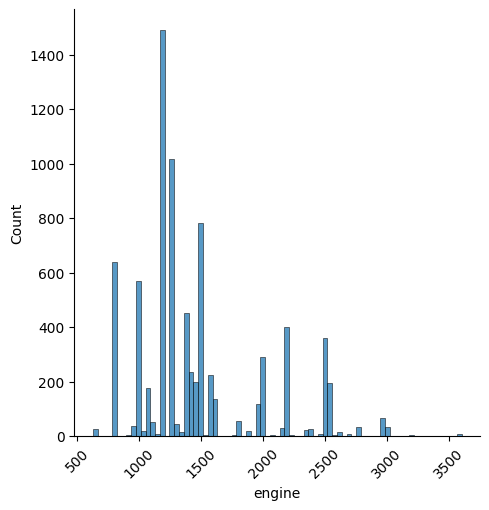

In [179]:
#Distribution Plot for engine

sns.displot(df, x = 'engine')
plt.xticks(rotation=45)
plt.show()

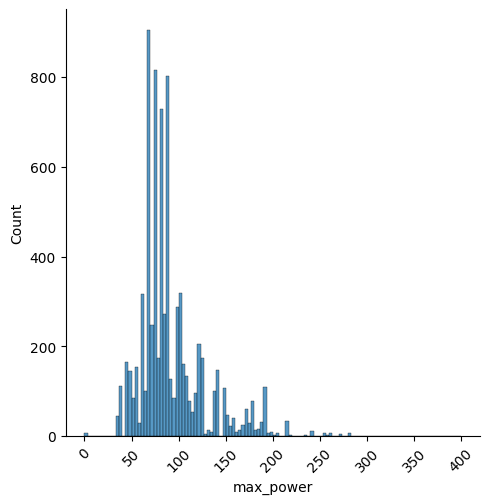

In [180]:
#Distribution Plot for max_power

sns.displot(df, x = 'max_power')
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

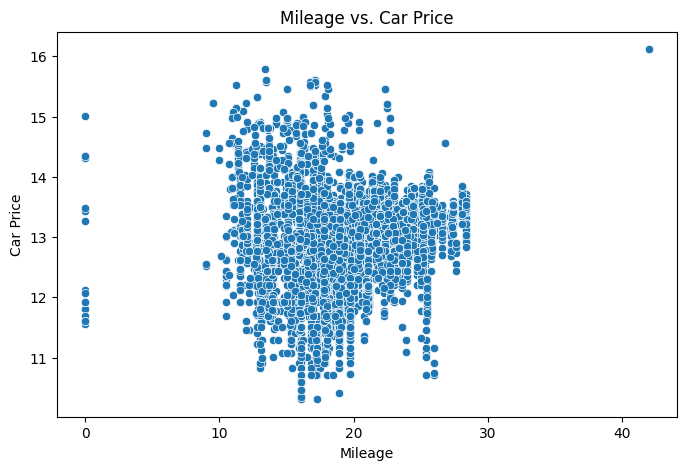

In [181]:
#Scatterplot of mileage vs. car price

plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.xlabel('Mileage')
plt.ylabel('Car Price')
plt.title('Mileage vs. Car Price')
plt.show()

Text(0.5, 1.0, 'Box Plot of Car Price')

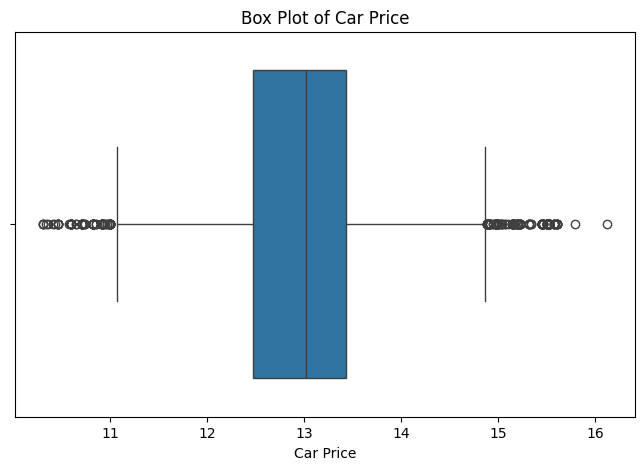

In [182]:
# Box plot for car price
# Visual Inspection using boxplots to find out the otliers
# Outliers are typically points that fall outside the whiskers of the box plot.

plt.figure(figsize=(8, 5))
sns.boxplot(x='selling_price', data=df)
plt.xlabel('Car Price')
plt.title('Box Plot of Car Price')


In [183]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,NaN,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,NaN,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,NaN,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,NaN,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,NaN,16.10,1298.0,88.20,5.0


In [184]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = ['seller_type','fuel','transmission']

for cols in categorical_features:
    df[cols] = le.fit_transform(df[cols])

In [185]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,0,1,1,NaN,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,0,1,1,NaN,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,1,1,1,NaN,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,0,1,1,NaN,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,1,1,1,NaN,16.10,1298.0,88.20,5.0


#### Correlation Matrix

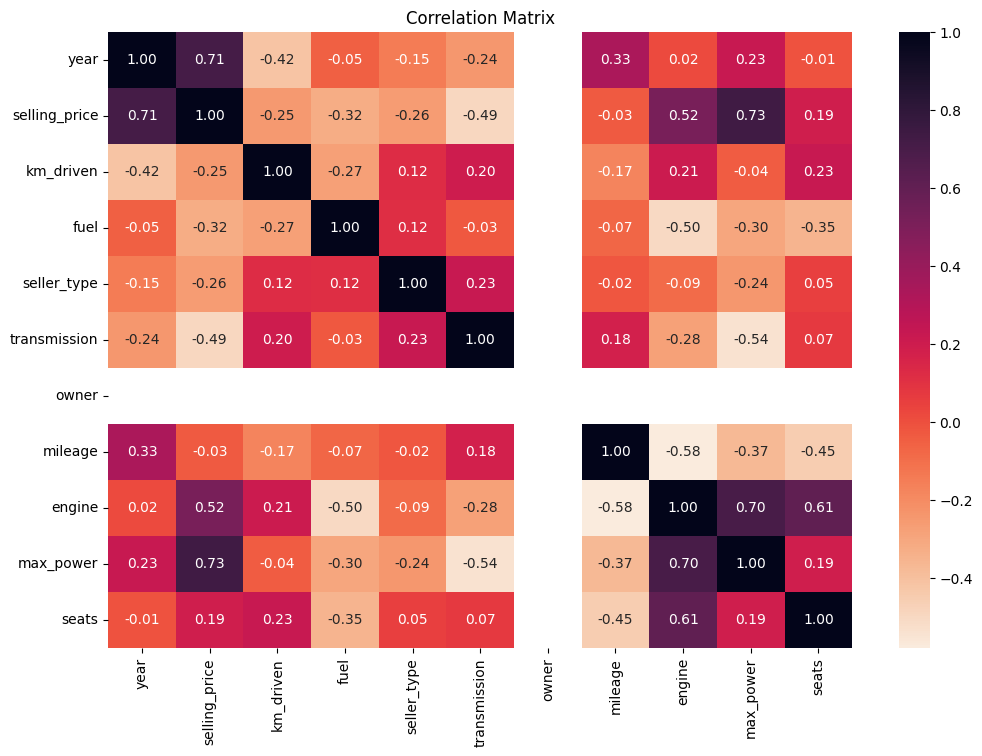

In [186]:
#Correlation Matrix
df = df.select_dtypes(exclude=[object])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

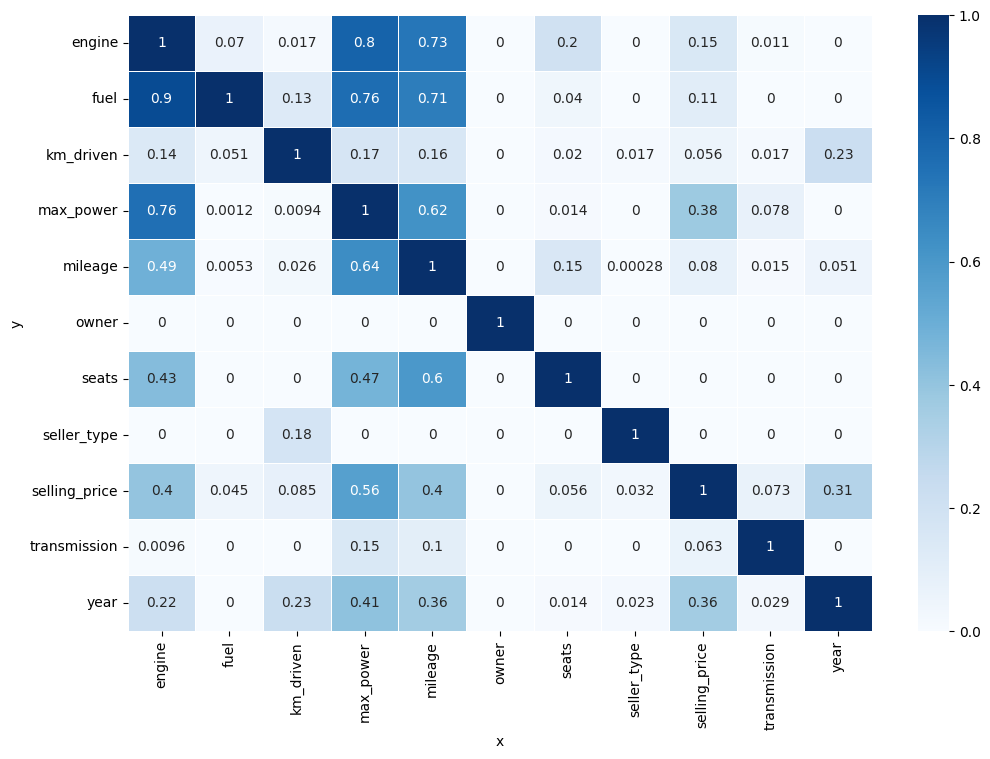

In [187]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (12,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)


In [188]:
# Calculate correlations between numerical features
correlations = df.corr()

# Set a threshold for feature selection (adjust as needed)
correlation_threshold = 0.65 # Adjust as needed

# Create a set to keep track of features to select
selected_features = set()

# Iterate through feature pairs and add features that exceed the threshold
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > correlation_threshold:
            selected_features.add(correlations.columns[i])
            selected_features.add(correlations.columns[j])

# Convert the set to a list
selected_features = list(selected_features)

# Print the selected features
print("Selected Features based on High Correlation with Any Other Feature:")
print(selected_features)

Selected Features based on High Correlation with Any Other Feature:
['year', 'selling_price', 'engine', 'max_power']


Based on the correlation matrix, we found that 'year', 'selling_price', 'engine', 'max_power' are the best features for predicting price as they have high correlation.

## Feature Selection

In [189]:
#x is our strong features
X = df[['engine', 'max_power','mileage'] ]

#y is simply the life expectancy col
y = df['selling_price']

Train Test Split

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Filling the missing values

In [191]:
engine = X_train['engine'].median()
max_power = X_train['max_power'].median()
mileage = X_train['mileage'].mean()

In [192]:
#check for null values
X_train[['mileage', 'max_power', 'engine']].isna().sum()

mileage      154
max_power    149
engine       154
dtype: int64

In [193]:
X_test[['mileage', 'max_power', 'engine']].isna().sum()

mileage      60
max_power    59
engine       60
dtype: int64

In [194]:
y_train.isna().sum()

0

In [195]:
y_test.isna().sum()

0

In [196]:
# Filling the training set first!

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [197]:
#let's fill the test set first!

X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [198]:
#checking whether null value exists or not
X_train[['mileage', 'max_power', 'engine']].isna().sum()
X_test[['mileage', 'max_power', 'engine']].isna().sum()

mileage      0
max_power    0
engine       0
dtype: int64

##### Checking Outliers

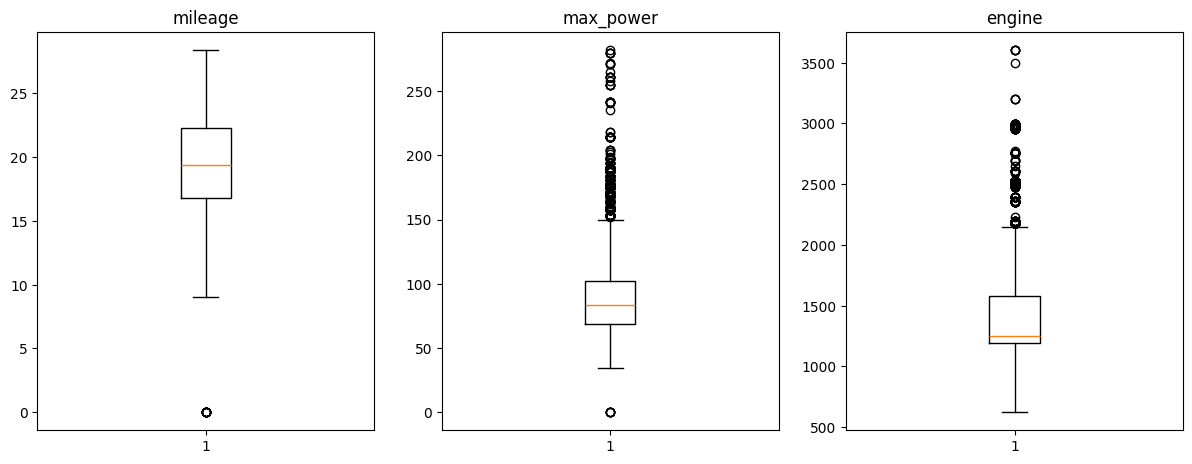

In [199]:
# Create a dictionary of columns.

feat_dict = {'mileage':1,'max_power':2,'engine':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in feat_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [200]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


## Scaling

In [201]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

In [202]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


### Modeling

In [204]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math
import mlflow
from mlflow.sklearn import log_model

# Custom penalty class to be used for regularization
class CustomPenalty:
    def __init__(self, l, l_ratio=None):
        self.l = l
        self.l_ratio = l_ratio

    def __call__(self, theta):
        raise NotImplementedError("Subclasses must implement __call__ method.")

    def derivation(self, theta):
        raise NotImplementedError("Subclasses must implement derivation method.")

# L1 (Lasso) penalty
class LassoPenalty(CustomPenalty):
    def __call__(self, theta):
        return self.l * np.sum(np.abs(theta))

    def derivation(self, theta):
        return self.l * np.sign(theta)

# L2 (Ridge) penalty
class RidgePenalty(CustomPenalty):
    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta

# Elastic Net penalty, a combination of L1 and L2 penalties
class ElasticPenalty(CustomPenalty):
    def __init__(self, l=0.1, l_ratio=0.5):
        super().__init__(l, l_ratio)

    def __call__(self, theta):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return l1_contribution + l2_contribution

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return l1_derivation + l2_derivation

# Polynomial penalty (no penalty for Polynomial regression)
class PolynomialPenalty(CustomPenalty):
    def __init__(self, degree):
        self.degree = degree

    def __call__(self, theta):
        return 0.0

    def derivation(self, theta):
        return np.zeros_like(theta)

# Custom regression class
class CustomRegression(BaseEstimator):
    kfold = KFold(n_splits=2)

    def __init__(self, regularization, name, lr, method, theta_type, momentum, num_epochs=500, batch_size=50, cv=kfold):
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method = method
        self.theta_type = theta_type
        self.momentum = momentum
        self.cv = cv
        self.regularization = regularization
        self.name = name
        self.model = None  # To store the trained model

    # Function to get the bias term
    def _bias(self):
        return self.theta[0]

    # Prediction function
    def predict(self, X):
        return X @ self.theta

    # Function to get the coefficients
    def _coef(self):
        return self.theta[1:]

    # Function to log MLflow data
    def log_mlflow_data(self, features, targets, context):
        mlflow_data = mlflow.data.from_numpy(features=features, targets=targets)
        mlflow.log_input(mlflow_data, context=context)

    # Function to train the model
    def train_model(self, X, y):
        yhat = self.predict(X)
        m = X.shape[0]
        grad = (1 / m) * X.T @ (yhat - y) + self.regularization.derivation(self.theta)

        if not hasattr(self, 'prev_step'):
            self.prev_step = np.zeros_like(self.theta)

        self.prev_step = self.momentum * self.prev_step + self.lr * grad
        self.theta = self.theta - self.prev_step

        return self.mse(y, yhat)

    # Function to fit the model to the training data
    def fit(self, X_train, y_train):
        self.kfold_scores = []  # Initialize list to store validation scores for each fold
        self.val_loss_old = np.infty

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
            X_cross_val, y_cross_val = X_train[val_idx], y_train[val_idx]

            # Initialize theta based on specified type
            self.theta = self.initialize_theta(X_cross_train.shape[1]) if self.theta_type == 'xavier' else np.zeros(
                X_cross_train.shape[1])

            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                params = {
                    "Regularization": type(self).__name__,
                    "Method": self.method,
                    "Theta": self.theta.tolist(),  # Convert numpy array to list for serialization
                    "Learning Rate": self.lr,
                    "Momentum": self.momentum
                }
                mlflow.log_params(params=params)

                for epoch in range(self.num_epochs):
                    # Shuffle training data
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train, y_cross_train = X_cross_train[perm], y_cross_train[perm]

                    # Train the model based on the specified method
                    train_loss = self.train_model(X_cross_train, y_cross_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    # Evaluate on validation set
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)

                    # Log training and validation data
                    self.log_mlflow_data(X_cross_train, y_cross_train, context="training")
                    self.log_mlflow_data(X_cross_val, y_cross_val, context="validation")

                    # Check for convergence
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new

                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")

                # Log the model
                log_model(self, f"model_fold_{fold}")

    # Function to initialize theta
    def initialize_theta(self, num):
        lower, upper = -(1.0 / math.sqrt(num)), (1.0 / math.sqrt(num))
        numbers = np.random.rand(num)
        scaled = lower + numbers * (upper - lower)
        return scaled

    # Function to calculate R2 score
    def r2_score(self, ytrue, ypred):
        return r2_score(ytrue, ypred)

    # Function to calculate mean squared error
    def mse(self, ytrue, ypred):
        return mean_squared_error(ytrue, ypred)


In [205]:
# Helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [206]:
import itertools
from sklearn.preprocessing import PolynomialFeatures



regs = ["Ridge", "ElasticNet", "Lasso", "Polynomial"]
methods = ["batch", "mini-batch", "stochastic"]
thetas = ['xavier', 'theta']
learning_rates = [0.01, 0.001, 0.0001]
momentums = [0, 1]

all_combinations = list(itertools.product(regs, momentums, methods, thetas, learning_rates))

# Init parameters
parameters = []

for combo in all_combinations:
    parameters.append({
        "momentum": combo[1],
        "reg": combo[0],
        "method": combo[2],
        "theta": combo[3],
        "lr": combo[4],
        "l": 0.1
    })

In [207]:
import mlflow
import tensorflow as tf

# Create a new experiment
experiment_name = "StabyaCarr"
experiment_id = mlflow.set_experiment(experiment_name)

with tf.device('/GPU:0'):
    for params in parameters:
        run_name = f"{params['method']}-{params['reg']}-{params['lr']}-{params['theta']}-momentum-{params['momentum']}"

        with mlflow.start_run(run_name=run_name):
            print(run_name)

            type_of_regression = str_to_class(params['reg'])
            model = type_of_regression(**params)  
            
            model.fit(X_train, y_train.values)

            yhat = model.predict(X_test)

            mse  = model.mse(y_test, yhat)
            r2 = model.r2(y_test, yhat)
            print("r2: ", r2)
            print("MSE: ", mse)
            

            mlflow.log_metric(key="test_mse", value=mse)
            mlflow.log_metric(key="r2", value=r2)

            mlflow.set_tag("model_name", run_name)

            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
            mlflow.sklearn.log_model(model, artifact_path=f'model/{run_name}', signature=signature)

            mlflow.end_run()
            print("***************")


2023/11/28 12:58:22 INFO mlflow.tracking.fluent: Experiment with name 'StabyaCarr' does not exist. Creating a new experiment.


batch-Ridge-0.01-xavier-momentum-0
Fold 0: 169.4766991067444
Fold 1: 169.25342892752022
r2:  -238.8780827966155
MSE:  168.77506172215723
***************
batch-Ridge-0.001-xavier-momentum-0
Fold 0: 169.98406587872506
Fold 1: 169.04036144853004
r2:  -239.0814490636907
MSE:  168.9181475509152
***************
batch-Ridge-0.0001-xavier-momentum-0
Fold 0: 169.54575503421594
Fold 1: 169.6813638864234
r2:  -239.05089385454747
MSE:  168.89664930793708
***************
batch-Ridge-0.01-theta-momentum-0
Fold 0: 169.442222928144
Fold 1: 168.91553932489938
r2:  -238.87861168718976
MSE:  168.7754338426039
***************
batch-Ridge-0.001-theta-momentum-0
Fold 0: 169.61331913982568
Fold 1: 168.9613645505187
r2:  -239.02081474905754
MSE:  168.87548604522283
***************
batch-Ridge-0.0001-theta-momentum-0
Fold 0: 169.61450648393367
Fold 1: 168.96254392129694
r2:  -239.0237591019414
MSE:  168.87755765315762
***************
mini-batch-Ridge-0.01-xavier-momentum-0
Fold 0: 169.38497142157522
Fold 1: 16

KeyboardInterrupt: 

In [ ]:
selling_price_model = pickle.load(open("../model/finalprediction.model", "rb"))
# Load a pre-trained machine learning model for predicting car selling prices
import pickle

# Create a sample data point for prediction with two features: "max_power" and "engine"
sample = {
    "max_power": [10],
    "engine": [1590]
}

# Convert the sample data into a Pandas DataFrame for processing
sample = pd.DataFrame(sample)

# Scale the sample data using the same scaler used during model training
scaled_sample = scaler.transform(sample)

# Use the pre-trained model to predict the selling price of the car
predicted_selling_price = selling_price_model.predict(scaled_sample)

# Reverse the log transformation applied during training to obtain the final predicted selling price
predicted_selling_price = np.exp(predicted_selling_price)

# Print the predicted selling price of the car model
print("Predicted selling price of this car model is: " + str(predicted_selling_price[0]))


In [ ]:
import pickle

# Save the model as a .pkl file
with open("../model/a2.pkl", "wb") as f:
    pickle.dump(linear_model, f)